# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     1207.
Date:                Wed, 03 Jan 2024   Prob (F-statistic):           1.01e-43
Time:                        23:57:54   Log-Likelihood:                 7.1529
No. Observations:                  50   AIC:                            -6.306
Df Residuals:                      46   BIC:                             1.342
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0072      0.075     67.190      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.50481544  4.95854917  5.37774881  5.73915027  6.02788535  6.23992454
  6.38273905  6.47407334  6.53902973  6.60594418  6.70173074  6.84745968
  7.0548957   7.324565    7.64566886  7.99785779  8.35457497  8.68741938
  8.97081205  9.18619862  9.32509773  9.39049453  9.3963502   9.36530816
  9.32497384  9.3033792   9.3243771   9.4037224   9.54648348  9.74620947
  9.98599015 10.24123425 10.48370972 10.68618215 10.82688936 10.89311682
 10.88328662 10.80721674 10.68450795 10.54132349 10.4060905  10.30482952
 10.25687941 10.27172003 10.3474147  10.47092841 10.62026942 10.76810247
 10.88623986 10.95027262]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.93147665 10.79845041 10.56793419 10.27807693  9.97909609  9.72098262
  9.54126146  9.45580412  9.45494277  9.50583726]


## Plot comparison

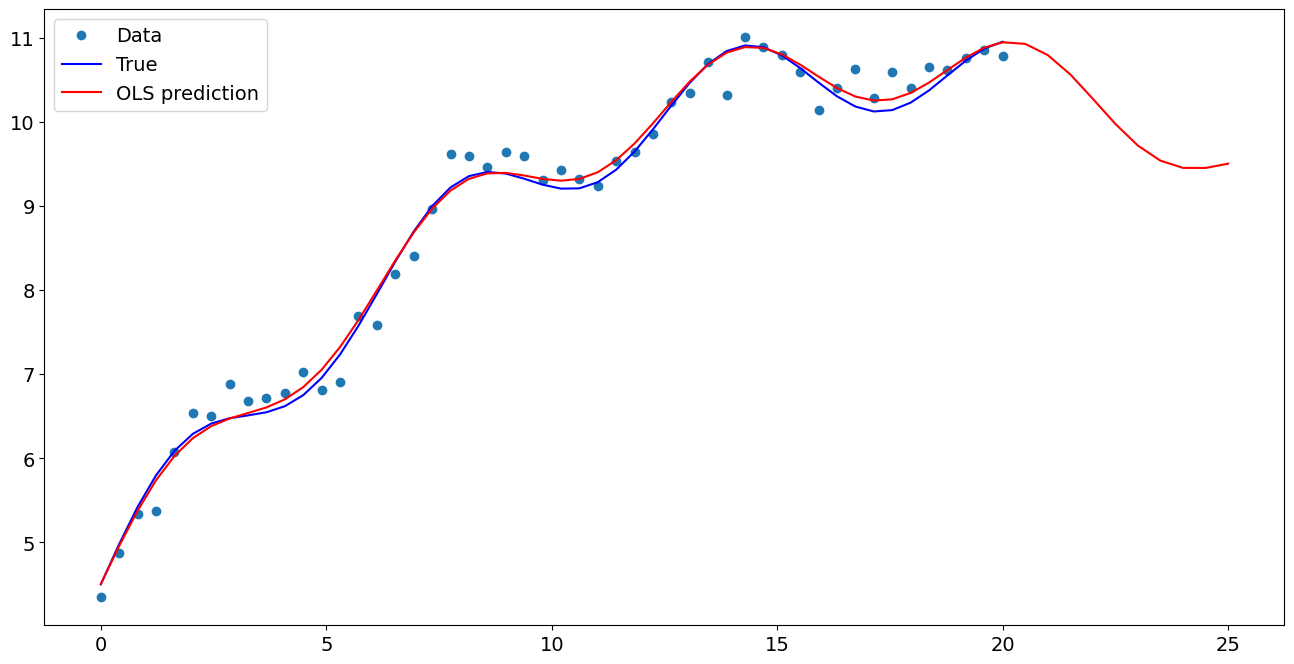

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.007248
x1                  0.503761
np.sin(x1)          0.426871
I((x1 - 5) ** 2)   -0.020097
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.931477
1    10.798450
2    10.567934
3    10.278077
4     9.979096
5     9.720983
6     9.541261
7     9.455804
8     9.454943
9     9.505837
dtype: float64